In [89]:
import pandas as pd
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [90]:
df= pd.read_csv('Bengaluru_House_Data.csv')
df.head() 

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [91]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


<Axes: xlabel='balcony', ylabel='Count'>

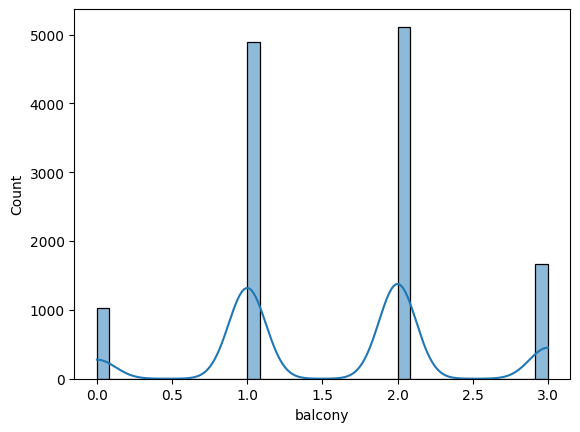

In [92]:
sns.histplot(df['balcony'].dropna(), kde=True)

## MAX ABSOLUTE SCALING

In [93]:
## VALYE/MAX VALUE

In [94]:
df_temp = df.copy()

In [95]:
df_temp['balcony'] = df_temp['balcony'] / df_temp['balcony'].abs().max()

<Axes: xlabel='price', ylabel='Count'>

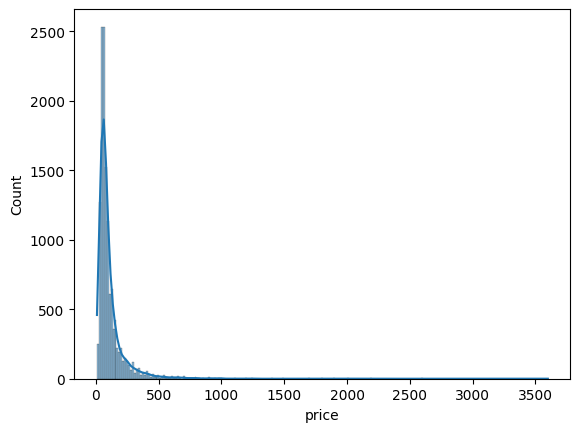

In [96]:
sns.histplot(df['price'].dropna(), kde=True)

In [97]:
## originial_value = scaled_value * (max)

## MIN-MAX SCALING

In [98]:
## value-min / max-min

In [99]:
df_temp = df.copy()

In [100]:
df_temp['price']= (df_temp['price'] - df_temp['price'].min())/ (df_temp['price'].max() - df_temp['price'].min())

<Axes: xlabel='price', ylabel='Count'>

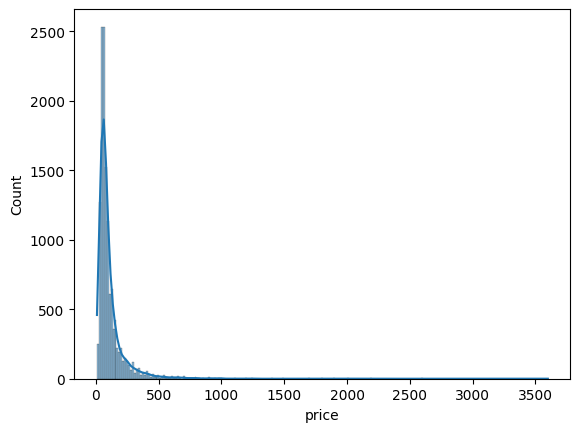

In [101]:
sns.histplot(df['price'].dropna(), kde=True)

In [102]:
#originial_value = scaled_value * (max-min) +min

### Log Transformation

<Axes: xlabel='balcony', ylabel='Density'>

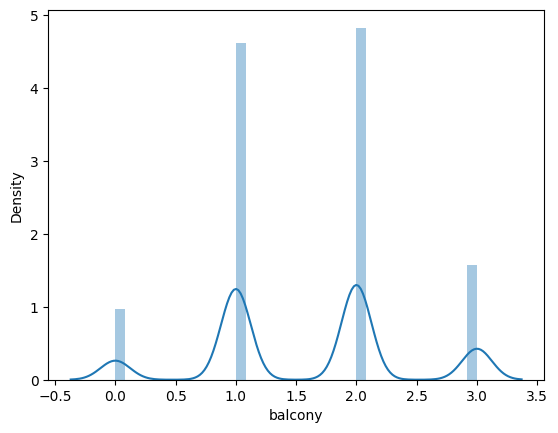

In [103]:
 
sns.distplot(df['balcony'])

In [104]:
df_temp= df.copy()

In [105]:
df_temp['balcony']= np.log(df_temp['balcony']+1)

<Axes: xlabel='balcony', ylabel='Density'>

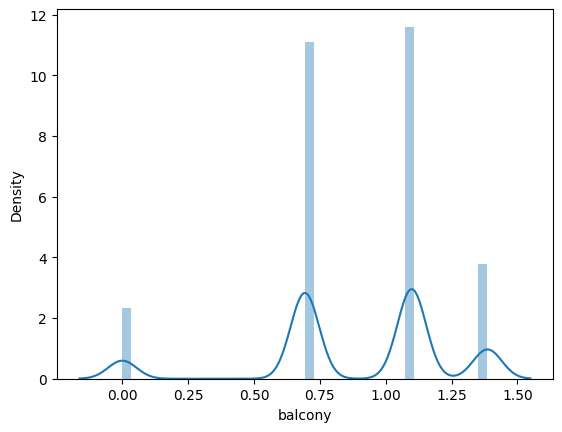

In [106]:
sns.distplot(df_temp['balcony']) 

## Standardization of Data

In [107]:
## z_score method#
# scaled_value= value- mean/std

In [108]:
## original_value = scaled_value * std+ mean

<Axes: xlabel='price', ylabel='Density'>

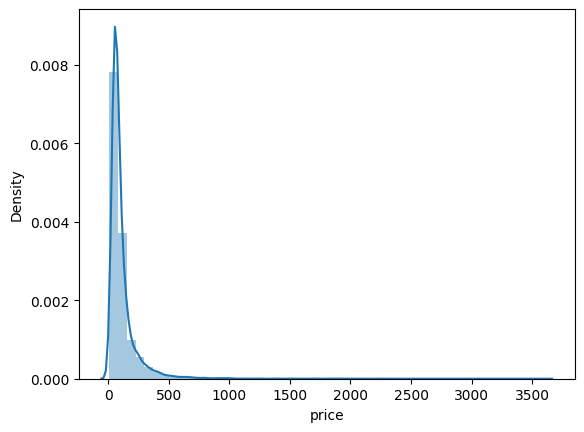

In [109]:
sns.distplot(df['price'])

In [110]:
scaled_data= df.copy()

In [111]:
##apply the formula
for col in ['price']:
    scaled_data[col] = (scaled_data[col] -  scaled_data[col].mean())/ scaled_data[col].std()
 

<Axes: xlabel='price', ylabel='Density'>

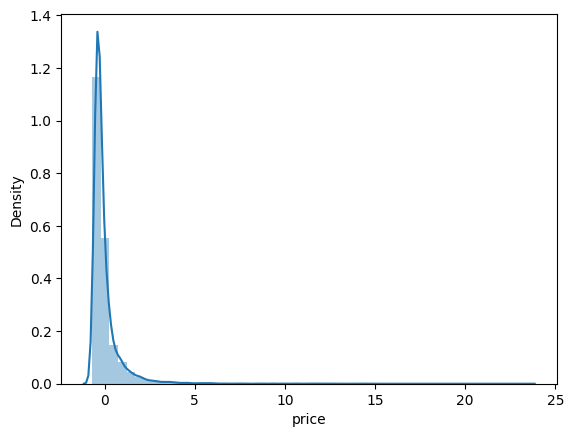

In [112]:
sns.distplot(scaled_data['price'])

In [113]:
from sklearn.preprocessing import StandardScaler
sc=  StandardScaler()

In [114]:
sc.fit(df[['price']])

,copy,True
,with_mean,True
,with_std,True


In [115]:
sc_data = sc.transform(df[['price']])

In [116]:
sc_data = sc_data.reshape(-1)

<Axes: ylabel='Density'>

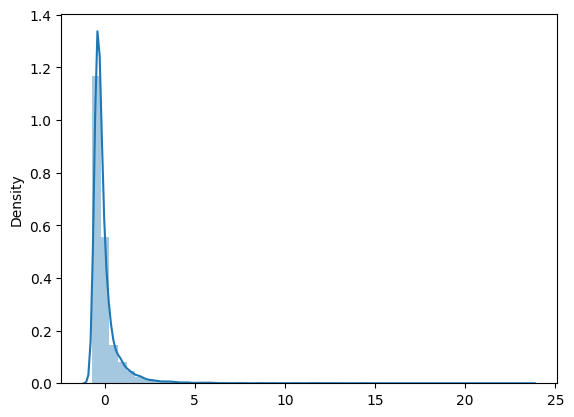

In [117]:
sns.distplot(sc_data)

## Detect and Remove Outliers

In [118]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


<Axes: xlabel='price', ylabel='Density'>

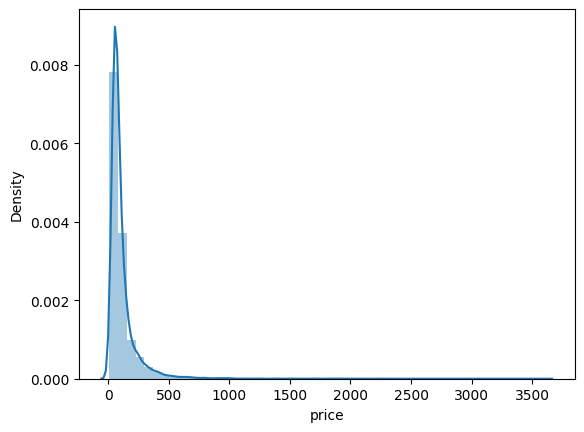

In [119]:
sns.distplot(df['price'])

<Axes: ylabel='price'>

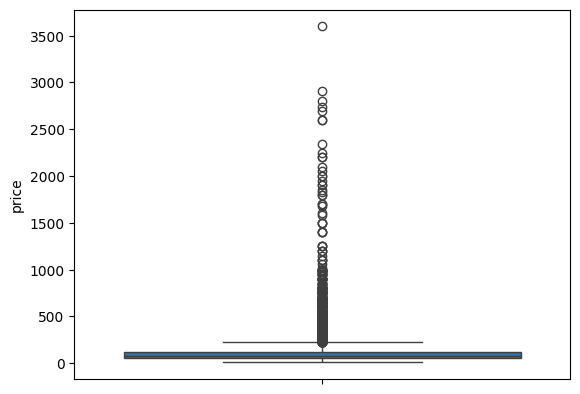

In [120]:
# to see outliers clearly
sns.boxplot(df['price'])

 ## Z-Score Method

In [121]:
## find the limits
upper_limit = df['price'].mean() + 1 * df['price'].std()
lower_limit = df['price'].mean() - 1 * df['price'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 261.5373002711755
lower limit: -36.40604726817253


In [122]:
## ## find the outliers
df.loc[(df['price'] > upper_limit) | (df ['price']<lower_limit )]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.0
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.0
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.0
18,Super built-up Area,Ready To Move,Ramakrishnappa Layout,3 BHK,PeBayle,2770,4.0,2.0,290.0
22,Plot Area,Ready To Move,Thanisandra,4 Bedroom,Soitya,2800,5.0,2.0,380.0
...,...,...,...,...,...,...,...,...,...
13261,Plot Area,Ready To Move,Havanur extension,3 Bedroom,NaN,2000,2.0,2.0,360.0
13290,Super built-up Area,Ready To Move,Sarjapur Road,4 BHK,Maana E,4050,2.0,1.0,450.0
13306,Plot Area,Ready To Move,Rajarajeshwari Nagara,4 Bedroom,NaN,1200,5.0,NaN,325.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0


## Trimming - delete the outlier data

In [123]:

new_df = df.loc[(df['price'] > lower_limit) & (df['price'] < upper_limit)]
print('old data:', len(df))
print('new data:', len(new_df))
print('outliers:', len(df) - len(new_df) )

old data: 13320
new data: 12372
outliers: 948


<Axes: ylabel='price'>

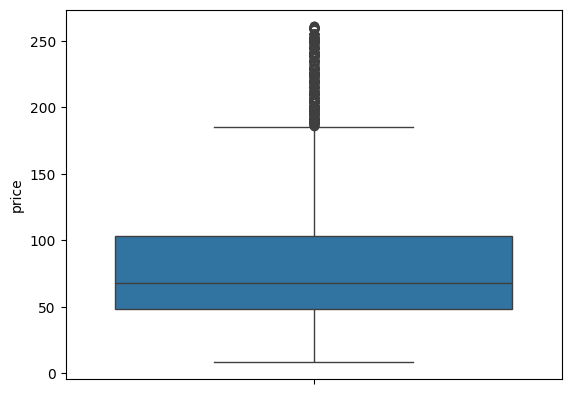

In [124]:
sns.boxplot(new_df['price'])

## Capping

In [125]:
new_df = df.copy()
new_df.loc[new_df['price']>upper_limit, 'price']= upper_limit
new_df.loc[new_df['price']<upper_limit, 'price']= lower_limit

<Axes: ylabel='price'>

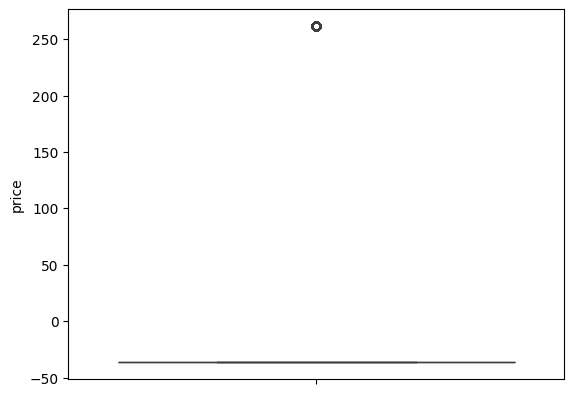

In [126]:
sns.boxplot(new_df['price'])

In [127]:
len(new_df)

13320

## inter_Quratile Range_method

In [128]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1


In [129]:
q1, q3, iqr

(np.float64(50.0), np.float64(120.0), np.float64(70.0))

In [130]:
upper_limit=q3+ +(1.5 *iqr)
lower_limit=q1-(1.5 *iqr)
lower_limit, upper_limit

(np.float64(-55.0), np.float64(225.0))

<Axes: ylabel='price'>

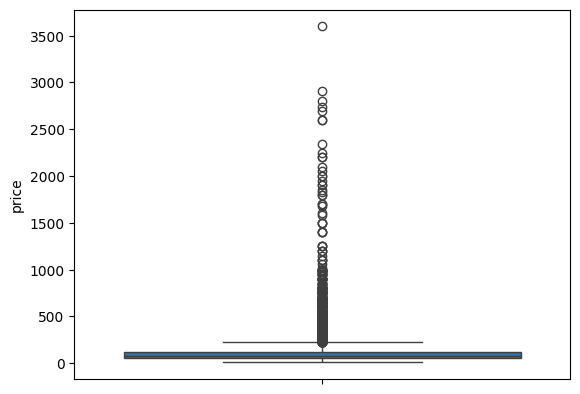

In [131]:
sns.boxplot(df['price'])

In [132]:

## ## find the outliers
df.loc[(df['price'] > upper_limit) | (df ['price']<lower_limit )]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.0
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.0
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.0
18,Super built-up Area,Ready To Move,Ramakrishnappa Layout,3 BHK,PeBayle,2770,4.0,2.0,290.0
22,Plot Area,Ready To Move,Thanisandra,4 Bedroom,Soitya,2800,5.0,2.0,380.0
...,...,...,...,...,...,...,...,...,...
13306,Plot Area,Ready To Move,Rajarajeshwari Nagara,4 Bedroom,NaN,1200,5.0,NaN,325.0
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.0
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0


In [133]:
## trimming
new_df = df.loc[(df['price'] > lower_limit) & (df['price'] < upper_limit)]
print('old data:', len(df))
print('new data:', len(new_df))
print('outliers:', len(df) - len(new_df) )

old data: 13320
new data: 12002
outliers: 1318


<Axes: ylabel='price'>

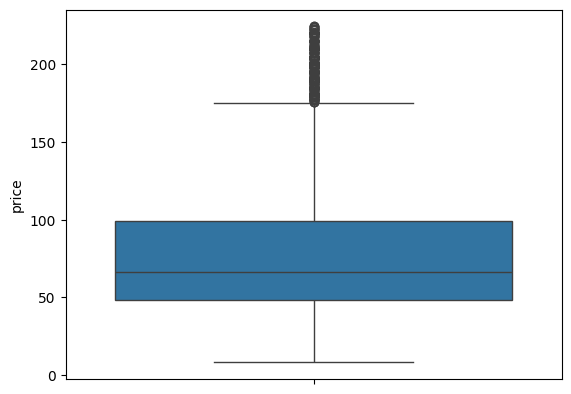

In [134]:
sns.boxplot(new_df['price'])

In [135]:
new_df = df.copy()
new_df.loc[new_df['price']>upper_limit, 'price']= upper_limit
new_df.loc[new_df['price']<upper_limit, 'price']= lower_limit

<Axes: ylabel='price'>

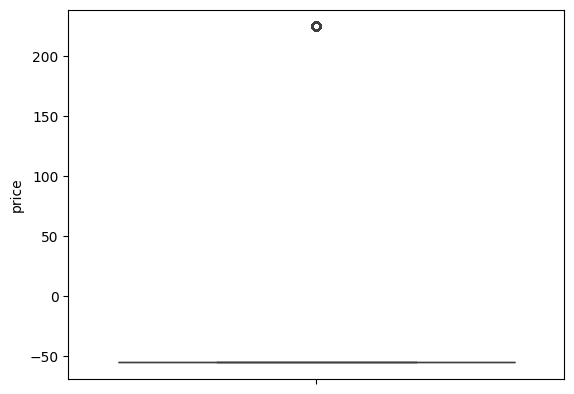

In [136]:
sns.boxplot(new_df['price'])

In [137]:
len(new_df)

13320

## Percentile Method

In [138]:
upper_limit = df['price'].quantile(0.99)
upper_limit = df['price'].quantile(0.01)
print('upper limit', upper_limit)
print('lower limit', lower_limit)


upper limit 18.5
lower limit -55.0


<Axes: ylabel='price'>

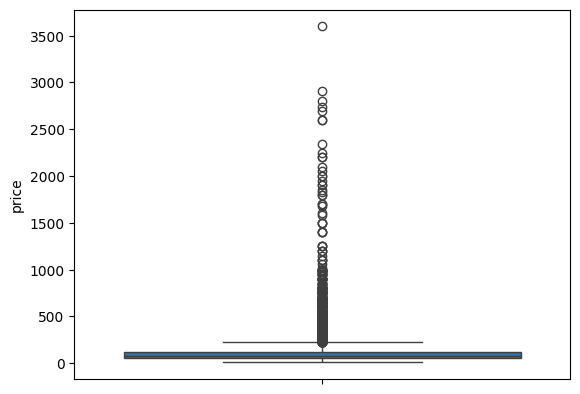

In [139]:
sns.boxplot(df['price'])

In [140]:
df.loc[(df['price'] > upper_limit) | (df ['price']<lower_limit )]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [141]:
## trimming
new_df = df.loc[(df['price'] <= lower_limit) & (df['price'] >= upper_limit)]
print('old data:', len(df))
print('new data:', len(new_df))
print('outliers:', len(df) - len(new_df) )

old data: 13320
new data: 0
outliers: 13320


## One-Hot Encoding

In [142]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [143]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder()

In [144]:

ohe.fit_transform(df[['area_type']]).toarray()


array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], shape=(13320, 4))

In [145]:

ohe_values = ohe.fit_transform(df[['area_type']]).toarray()
ohe_df = pd.DataFrame(ohe_values, columns=ohe.get_feature_names_out(['area_type']))
enc_df = pd.concat([df, ohe_df], axis=1)
enc_df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0.0,0.0,0.0,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0.0,0.0,1.0,0.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,1.0,0.0,0.0,0.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0.0,0.0,0.0,1.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0.0,0.0,0.0,1.0


In [146]:
## ohe using pandas
enc_df=pd.get_dummies(df,prefix=['area_type'], columns= ['area_type'],drop_first=True)
enc_df.head()

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,False,False,True
1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,False,True,False
2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,False,False,False
3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,False,False,True
4,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,False,False,True


## Mean/Target Enconding

In [147]:
df =pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [148]:
#mapping_dict = {
   # 'Iris-setosa': 0,
   # 'Iris-versicolor': 1,
   # 'Iris-virginica': 2}

#df['Species_encoded'] = df['Species'].map(mapping_dict)


In [149]:
from category_encoders import TargetEncoder
import pandas as pd


df = pd.read_csv('Iris.csv')

cols = ['SepalLengthCm', 'SepalWidthCm']
target = 'Species'

for col in cols:
    te = TargetEncoder()
    te.fit(X=df[col], y=df[target])
    values = te.transform(df[col]) 
    df = pd.concat([df, values.add_suffix(f'_{col}_encoded')], axis=1)

df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthCm_SepalLengthCm_encoded,SepalWidthCm_SepalWidthCm_encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,5.1,3.5
1,2,4.9,3.0,1.4,0.2,Iris-setosa,4.9,3.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,4.7,3.2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,4.6,3.1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,5.0,3.6


In [150]:
df.sample(frac=1).head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthCm_SepalLengthCm_encoded,SepalWidthCm_SepalWidthCm_encoded
81,82,5.5,2.4,3.7,1.0,Iris-versicolor,5.5,2.4
19,20,5.1,3.8,1.5,0.3,Iris-setosa,5.1,3.8
75,76,6.6,3.0,4.4,1.4,Iris-versicolor,6.6,3.0
62,63,6.0,2.2,4.0,1.0,Iris-versicolor,6.0,2.2
53,54,5.5,2.3,4.0,1.3,Iris-versicolor,5.5,2.3
141,142,6.9,3.1,5.1,2.3,Iris-virginica,6.9,3.1
51,52,6.4,3.2,4.5,1.5,Iris-versicolor,6.4,3.2
68,69,6.2,2.2,4.5,1.5,Iris-versicolor,6.2,2.2
89,90,5.5,2.5,4.0,1.3,Iris-versicolor,5.5,2.5
97,98,6.2,2.9,4.3,1.3,Iris-versicolor,6.2,2.9


## Frequency Encoding

In [151]:
df = pd.read_csv('Train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [152]:
df.groupby('Education').size()

Education
Graduate        480
Not Graduate    134
dtype: int64

In [153]:
# group by frequency
freq = df['Education'].value_counts() / len(df)
# map the values using the correct column name
df['Education_freq'] = df['Education'].map(freq)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Education_freq
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.781759
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.781759
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.781759
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.218241
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.781759


## Binary Encoding

In [154]:
# 0 0- 0
#0 1 - 1
#0 0 - 2
#1 1 - 3

In [155]:
%pip install category_encoders
from category_encoders import BinaryEncoder

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [156]:
be = BinaryEncoder()
be_enc=be.fit_transform(df[['Self_Employed']])


In [157]:
enc_df = pd.concat([df, be_enc],axis=1)
enc_df.sample(frac=1).head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Education_freq,Self_Employed_0,Self_Employed_1
25,LP001066,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y,0.781759,1,0
382,LP002231,Female,No,0,Graduate,No,6000,0.0,156.0,360.0,1.0,Urban,Y,0.781759,0,1
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y,0.218241,0,1
189,LP001647,Male,Yes,0,Graduate,No,9328,0.0,188.0,180.0,1.0,Rural,Y,0.781759,0,1
491,LP002562,Male,Yes,1,Not Graduate,No,5333,1131.0,186.0,360.0,NaN,Urban,Y,0.218241,0,1
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y,0.781759,0,1
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N,0.781759,0,1
235,LP001784,Male,Yes,1,Graduate,No,5500,1260.0,170.0,360.0,1.0,Rural,Y,0.781759,0,1
248,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123.0,480.0,1.0,Semiurban,Y,0.781759,0,1
187,LP001643,Male,Yes,0,Graduate,No,2383,2138.0,58.0,360.0,NaN,Rural,Y,0.781759,0,1


## Fill Missing Values in Dataset

In [158]:
df = pd.read_csv('Train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [159]:
## check null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Fill with Negative Values

In [160]:
new_df= df.copy()

In [161]:
bew_df=df.fillna(-999)
new_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## CONSIDER NULL VALUES AS NEW Category

In [162]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [163]:
## consider nan as category
new_df['Gender'] = df['Gender'].fillna('nan')

In [164]:
new_df['Gender'].value_counts()

Gender
Male      489
Female    112
nan        13
Name: count, dtype: int64

## Drop rows which have null values

In [165]:
new_df= df.copy()

In [166]:
len(new_df)

614

In [167]:
new_df= df.dropna(axis=0)
len(new_df)

480

In [168]:
new_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Fill missing values with MEAN,MEDIAN AND MODE

In [172]:
new_df= df.copy()

In [169]:
df['LoanAmount'].mean()

np.float64(146.41216216216216)

<Axes: xlabel='LoanAmount', ylabel='Density'>

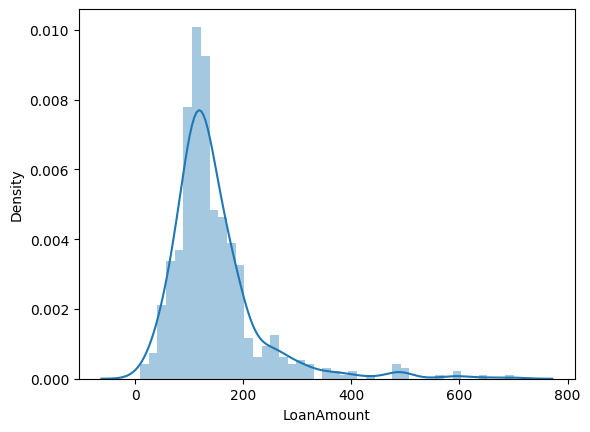

In [170]:
sns.distplot(df['LoanAmount'])

In [173]:
#fill missing value for numerical
new_df['LoanAmount'] = new_df['LoanAmount'].fillna(df['LoanAmount'].mean())
new_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [176]:
df['Loan_Amount_Term'].median()

np.float64(360.0)

In [177]:
new_df['Loan_Amount_Term'] = new_df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
new_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## for catergorical value

<Axes: xlabel='count', ylabel='Self_Employed'>

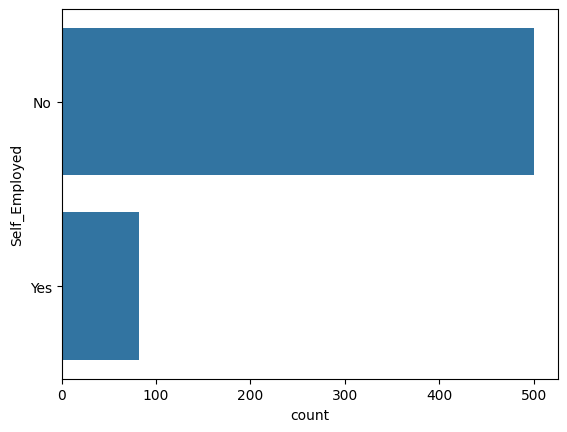

In [180]:
sns.countplot(df['Self_Employed'])

In [182]:
df['Self_Employed'].mode()[0]

'No'

In [185]:
new_df['Self_Employed'] = new_df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
new_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## fill missing vlaues based on group category

In [188]:
new_df=df.copy()

In [193]:
df.groupby('Loan_Status')['LoanAmount'].mean()

Loan_Status
N    151.220994
Y    144.294404
Name: LoanAmount, dtype: float64

In [195]:
mean_df= df.groupby('Loan_Status')['LoanAmount'].mean()

In [209]:
mean_df['N']

np.float64(151.22099447513813)

In [212]:
## for numerical values
new_df.loc[new_df['Loan_Status']=='N', 'LoanAmount'] = new_df.loc[new_df['Loan_Status']=='N', 'LoanAmount'].fillna(mean_df['N'])
new_df.loc[new_df['Loan_Status']=='Y', 'LoanAmount'] = new_df.loc[new_df['Loan_Status']=='Y', 'LoanAmount'].fillna(mean_df['Y'])

In [208]:
new_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           11
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [216]:
for val in mean_df.keys():
   print(val)

N
Y


In [221]:
df_mean = df.groupby('Loan_Status')['Loan_Amount_Term'].mean()
df_mean

Loan_Status
N    344.064516
Y    341.072464
Name: Loan_Amount_Term, dtype: float64

In [225]:
for val in mean_df.keys():
    new_df.loc[new_df['Loan_Status']==val, 'Loan_Amount_Term'] = new_df.loc[new_df['Loan_Status']==val, 'Loan_Amount_Term'].fillna(mean_df[val])


In [226]:
new_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [234]:
## for categorical data
mode_df = df.groupby('Loan_Status')['Self_Employed'].agg(pd.Series.mode)
mode_df

Loan_Status
N    No
Y    No
Name: Self_Employed, dtype: object

## Fill missing value using ML model

In [235]:
new_df=df.copy()


In [238]:
len(new_df)

614

In [240]:
col= "LoanAmount"

In [ ]:
# fill numerical values
new_df_teep = new_df.dropna(subset=['col'])
print("col", len(new_df_teep))

Loan amount 592


In [242]:
# input and output split
X = new_df_teep.drop(columns=[col])
y = new_df_teep[col]

In [246]:
%pip install lightgbm
from lightgbm import LGBMRegressor

# Encode categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

model = LGBMRegressor()
model.fit(X_encoded, y)


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 592, number of used features: 14
[LightGBM] [Info] Start training from score 146.412162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [ ]:
d = {}
teep = new_df.drop(columns=[col])
teep_encoded = pd.get_dummies(teep, drop_first=True)
# Align columns to match training data
teep_encoded = teep_encoded.reindex(columns=X_encoded.columns, fill_value=0)
d[col] = list(model.predict(teep_encoded))


In [251]:
i= 0
for val, d_val in zip(new_df[col], d [col]):
    if pd.isna(val):
        new_df.at[i,col] =d_val
    i+= 1

In [253]:
new_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [254]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,147.240294,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
## fill missing value for categroica; -LGBMClassifier
